In [1]:
# HPC
import netCDF4 as nc
import numpy as np
import xarray as xr
from scipy.interpolate import interp1d

# Plotting
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

# Paths and stuff
import os
import sys

# Append to sys.path the absolute path to src/XAIRT
path_list = os.path.abspath('').split('/')
path_src_pySICOPOLIS = ''
for link in path_list[:-1]:
    path_src_pySICOPOLIS = path_src_pySICOPOLIS+link+'/'
sys.path.append(path_src_pySICOPOLIS+'/src')

# Now import module pySICOPOLIS
from pySICOPOLIS import *

In [2]:
ds_temp = xr.open_dataset('/scratch2/shreyas/GrIS_paleo_data/RDBTS4_Greenland_1993_2017_02_basal_thermal_state.nc')
ds_vel  = xr.open_dataset('/scratch2/shreyas/GrIS_paleo_data/RDGBV4_Greenland_1993_2013_01_balance_velocity_9ka.nc')
ds_age  = xr.open_dataset('/scratch2/shreyas/GrIS_paleo_data/RRRAG4_Greenland_1993_2013_01_age_grid.nc')
ds_bm5  = xr.open_dataset('/scratch2/shreyas/GrIS_paleo_data/BedMachineGreenland-v5.nc')

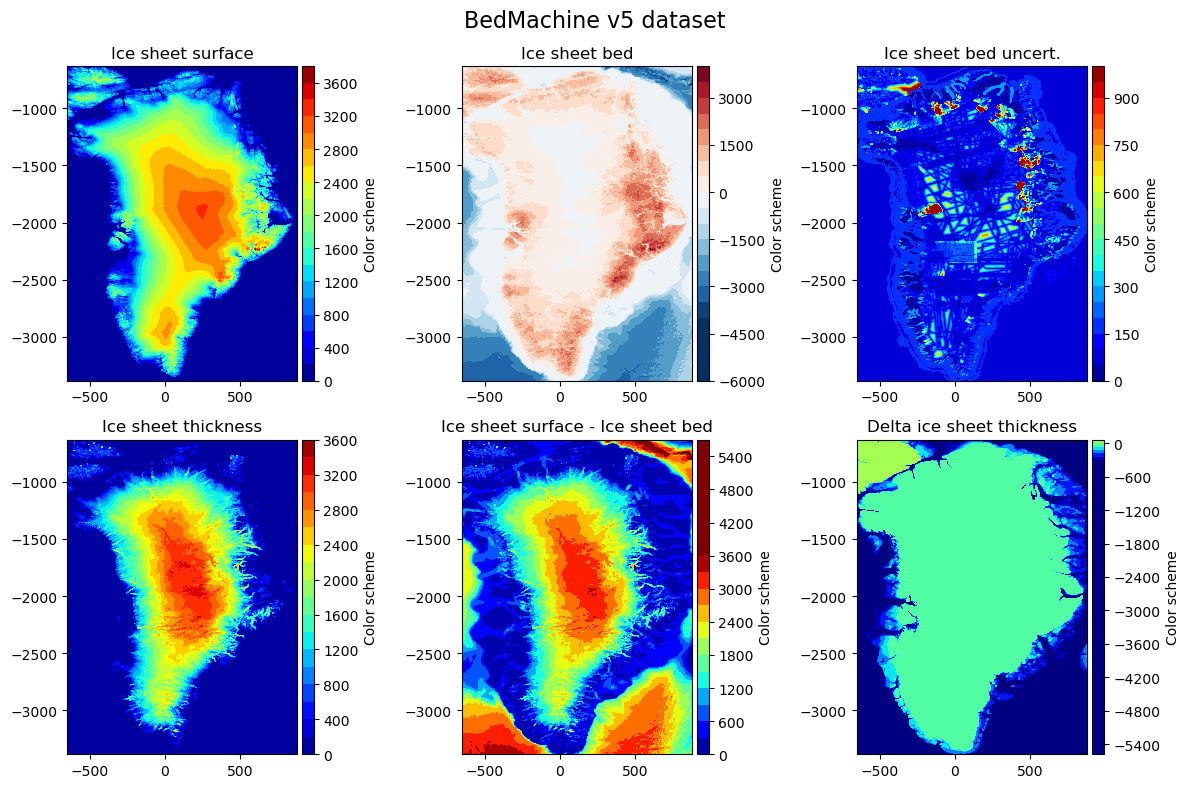

In [3]:
plt.rcParams["figure.figsize"] = (12,8)
fig, ax = plt.subplots(2,3)

fancyPlotter.plot_normal(0.001*ds_bm5['x'], 0.001*ds_bm5['y'], 
                         ds_bm5.variables['surface'],
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0,0])
ax[0,0].set_title('Ice sheet surface')

fancyPlotter.plot_normal(0.001*ds_bm5['x'], 0.001*ds_bm5['y'], 
                         ds_bm5.variables['bed'],
                         cmap = 'RdBu_r', nbins = 20, fig = fig, ax = ax[0,1],
                         vmin = -4000, vmax = 4000)
ax[0,1].set_title('Ice sheet bed')

fancyPlotter.plot_normal(0.001*ds_bm5['x'], 0.001*ds_bm5['y'], 
                         ds_bm5.variables['errbed'],
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0,2])
ax[0,2].set_title('Ice sheet bed uncert.')

fancyPlotter.plot_normal(0.001*ds_bm5['x'], 0.001*ds_bm5['y'], 
                         ds_bm5.variables['thickness'],
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1,0])
ax[1,0].set_title('Ice sheet thickness')

fancyPlotter.plot_normal(0.001*ds_bm5['x'], 0.001*ds_bm5['y'], 
                         ds_bm5.variables['surface']-ds_bm5.variables['bed'],
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1,1],
                         vmax = 3600)
ax[1,1].set_title('Ice sheet surface - Ice sheet bed')

fancyPlotter.plot_normal(0.001*ds_bm5['x'], 0.001*ds_bm5['y'], 
                         ds_bm5.variables['thickness']-(ds_bm5.variables['surface']-ds_bm5.variables['bed']),
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[1,2],
                         vmin = -300, vmax = 300)
ax[1,2].set_title('Delta ice sheet thickness')

fig.suptitle('BedMachine v5 dataset', fontsize = 16)
plt.tight_layout()

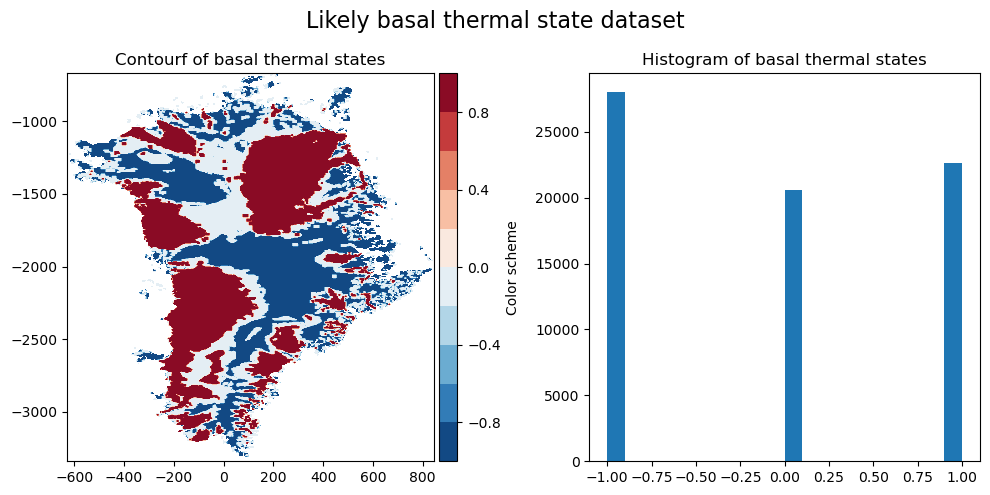

In [4]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots(1,2)

fancyPlotter.plot_normal(ds_temp['x']*0.001, ds_temp['y']*0.001, 
                         ds_temp.variables['likely_basal_thermal_state'],
                         cmap = 'RdBu_r', nbins = 10, fig = fig, ax = ax[0])
ax[0].set_title('Contourf of basal thermal states')


ax[1].hist(ds_temp.variables['likely_basal_thermal_state'].to_numpy().flatten(), 
           bins = 20)
ax[1].set_title('Histogram of basal thermal states')
fig.suptitle('Likely basal thermal state dataset', fontsize = 16)

plt.tight_layout()

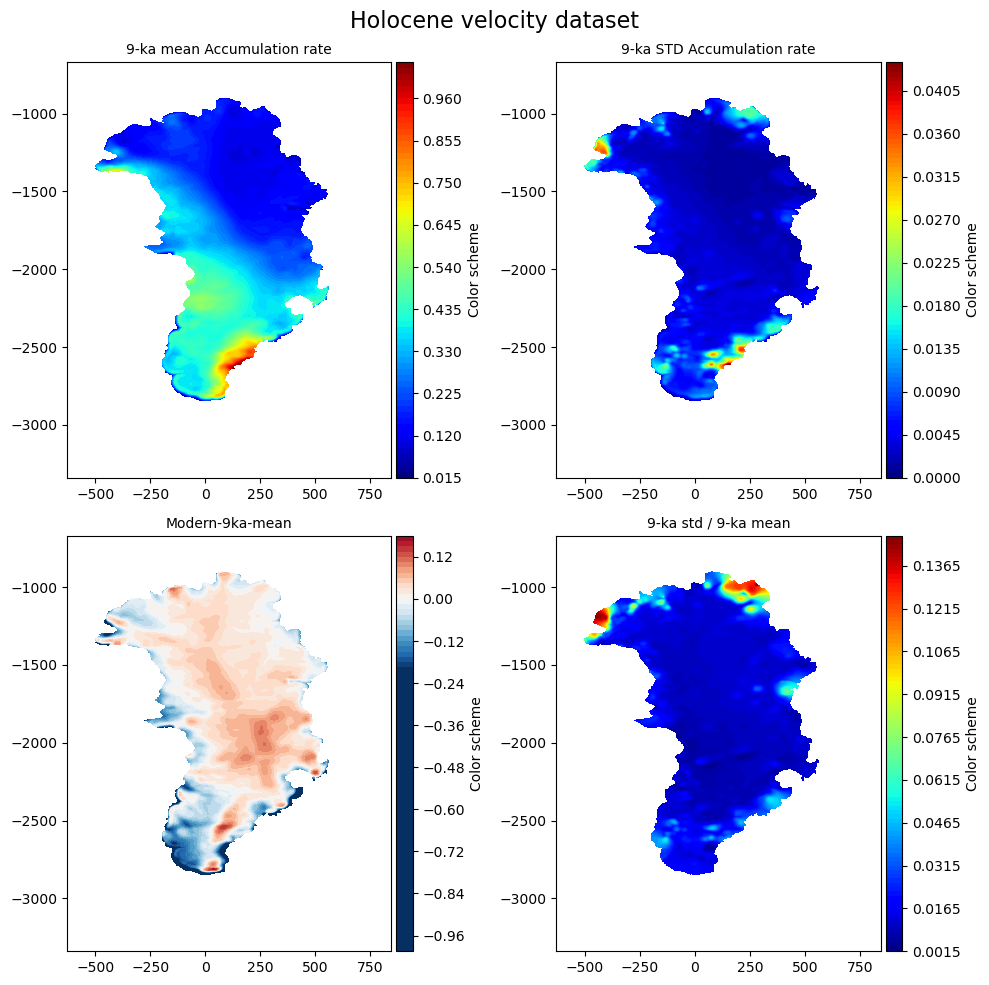

In [5]:
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(2,2)

fancyPlotter.plot_normal(ds_temp['x']*0.001, ds_temp['y']*0.001, 
                         ds_vel.variables['accumulation_rate'][0][:,::-1].T,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[0,0])

ax[0,0].set_title('9-ka mean Accumulation rate', fontsize=10)

### 1 sigma STD
STD = 0.25*(ds_vel.variables['accumulation_rate'][2]-ds_vel.variables['accumulation_rate'][1])
fancyPlotter.plot_normal(ds_temp['x']*0.001, ds_temp['y']*0.001, 
                         STD[:,::-1].T,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[0,1])

ax[0,1].set_title('9-ka STD Accumulation rate', fontsize=10)

fancyPlotter.plot_normal(ds_temp['x']*0.001, ds_temp['y']*0.001, 
                         ds_vel.variables['accumulation_rate_difference'][0][:,::-1].T,
                         cmap = 'RdBu_r', nbins = 100, fig = fig, ax = ax[1,0], vmin = -0.2, vmax = 0.2)

ax[1,0].set_title('Modern-9ka-mean', fontsize=10)

fancyPlotter.plot_normal(ds_temp['x']*0.001, ds_temp['y']*0.001, 
                         STD[:,::-1].T/ds_vel.variables['accumulation_rate'][0][:,::-1].T,
                         cmap = 'jet', nbins = 100, fig = fig, ax = ax[1,1])

ax[1,1].set_title('9-ka std / 9-ka mean', fontsize=10)

fig.suptitle('Holocene velocity dataset', fontsize = 16)
plt.tight_layout()

In [6]:
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots(2,2)
age_isochrones = ds_age.variables['age_iso'].data

fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         ds_age.variables['depth_iso'][0],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[0,0],
                         cbar_label = 'metres')

ax[0,0].set_title(f'Depth of isochrone {age_isochrones[0]/1000} ka', fontsize=10)

fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         ds_age.variables['depth_iso_uncert'][0],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[0,1],
                         cbar_label = 'metres')

ax[0,1].set_title(f'Uncert. depth of isochrone {age_isochrones[0]/1000} ka', fontsize=10)

fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         ds_age.variables['age_norm'][0],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[1,0],
                         cbar_label = 'metres')

### Age layer 1/26 is just age 0
ax[1,0].set_title(f'Age layer 2/26 in years', fontsize=10)

fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         ds_age.variables['age_norm_uncert'][0]/ds_age.variables['age_norm'][0],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[1,1],
                         cbar_label = 'metres', vmax = 10)

### Age layer 1/26 is just age 0
ax[1,1].set_title(f'Normalized uncert in age layer 2/26', fontsize=10)

fig.suptitle('Age layer dataset', fontsize = 16)
plt.tight_layout()

In [7]:
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots(1,3, width_ratios=[1,1,2])

xIndex = int(ds_age['x'].shape[0]/2)
yIndex = int(ds_age['y'].shape[1]/2)

xLoc = ds_age['x'][xIndex,0].data
yLoc = ds_age['y'][0,yIndex].data
age_z = np.concatenate((np.array([0.]),ds_age.variables['age_norm'][:, xIndex, yIndex].data), axis = 0)
age_uncert_z = np.concatenate((np.array([0.]),ds_age.variables['age_norm_uncert'][:, xIndex, yIndex].data), axis = 0)
depth_z = np.concatenate((np.array([0.]),ds_age['depth_norm']))*ds_age.variables['thick'][xIndex, yIndex].data

fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         ds_age.variables['thick'],
                         cmap = 'jet', nbins = 100, 
                         fig = fig, ax = ax[2],
                         cbar_label = 'metres')
ax[2].set_title(f'Ice thickness plot', fontsize=10)

fancyPlotter.plot_1D_depth_profile(age_z/1000, depth_z, age_uncert_z/1000,
                                   fig=fig, ax = ax[0], 
                                   linestyle='-', marker='o', color='b')
ax[0].set_title(f'x = {xLoc}, y = {yLoc}', fontsize=10)
ax[0].set_xlabel(f'Age in ka', fontsize=10)
ax[2].scatter(xLoc, yLoc, s=250, c='black', marker='x')

xIndex = int(ds_age['x'].shape[0]/2)
yIndex = int(3*ds_age['y'].shape[1]/4)

xLoc = ds_age['x'][xIndex,0].data
yLoc = ds_age['y'][0,yIndex].data
age_z = np.concatenate((np.array([0.]),ds_age.variables['age_norm'][:, xIndex, yIndex].data), axis = 0)
age_uncert_z = np.concatenate((np.array([0.]),ds_age.variables['age_norm_uncert'][:, xIndex, yIndex].data), axis = 0)
depth_z = np.concatenate((np.array([0.]),ds_age['depth_norm']))*ds_age.variables['thick'][xIndex, yIndex].data

fancyPlotter.plot_1D_depth_profile(age_z/1000, depth_z, age_uncert_z/1000,
                                   fig=fig, ax = ax[1], 
                                   linestyle='-', marker='o', color='b')
ax[1].set_title(f'x = {xLoc}, y = {yLoc}', fontsize=10)
ax[1].set_xlabel(f'Age in ka', fontsize=10)
ax[2].scatter(xLoc, yLoc, s=250, c='black', marker='x')

fig.suptitle(f'Age layers at different locations')
plt.tight_layout()

In [8]:
yIndex = int(ds_age['y'].shape[1]/2)
yLoc = ds_age['y'][0,yIndex].data

In [9]:
age_ySection = np.concatenate((np.zeros((1,ds_age['x'].shape[0]), dtype = np.float64),
                        ds_age.variables['age_norm'][:, :, yIndex].data), 
                       axis = 0)
age_ySection = age_ySection[::-1]

thickness_ySection = ds_age.variables['thick'][:,yIndex].data
heights_ySection = np.zeros(age_ySection.shape, dtype = np.float64)

In [10]:
delta_z = 1/(heights_ySection.shape[0]-1)*thickness_ySection
for k in range(heights_ySection.shape[0]):
    heights_ySection[k] = delta_z*k

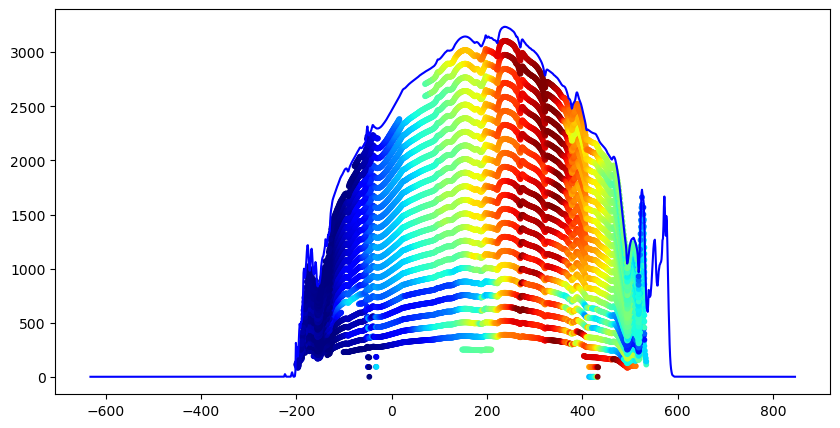

In [11]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots()

x = ds_age['x'][:,0]
for k in range(heights_ySection.shape[0]-1):
    plt.scatter(x, heights_ySection[k], s=10,c=age_ySection[k])
plt.plot(x, heights_ySection[-1], c='b')

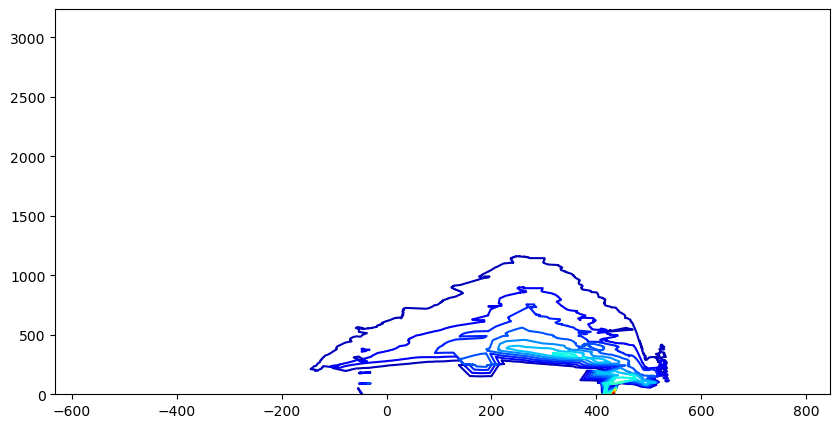

In [12]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots()

xTri = np.tile(x,26)
hTri = np.reshape(heights_ySection, (-1,))
ageTri = np.reshape(age_ySection, (-1,))
ageTri = np.nan_to_num(ageTri)

ax.tricontour(xTri, hTri, ageTri, levels=20, cmap="jet")